<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Food_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries
import pandas as pd

# Load your dataset (update the file name if different)
df = pd.read_csv('/content/train_1.csv')

# View the first few rows
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
# Check for missing values
df.isnull().mean() * 100

,0
id,0.0
week,0.0
center_id,0.0
meal_id,0.0
checkout_price,0.0
base_price,0.0
emailer_for_promotion,0.0
homepage_featured,0.0
num_orders,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


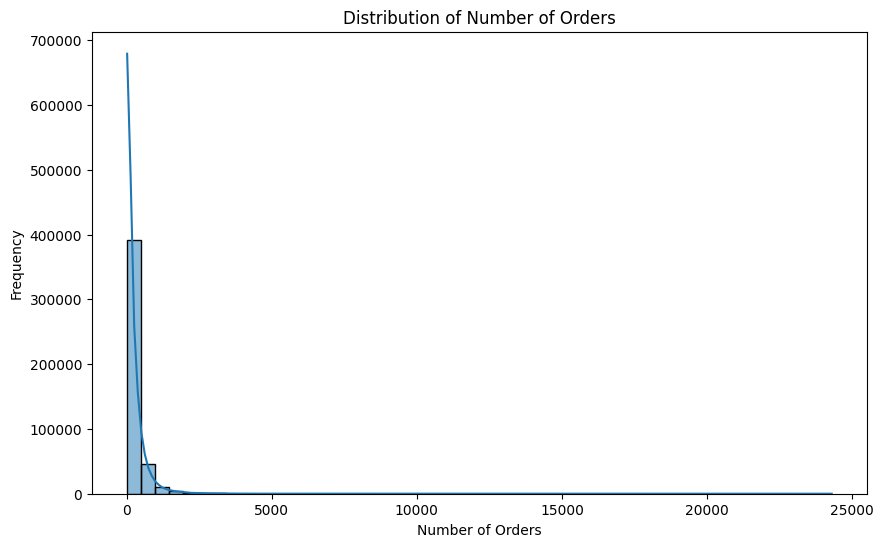

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['num_orders'], bins=50, kde=True)
plt.title('Distribution of Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

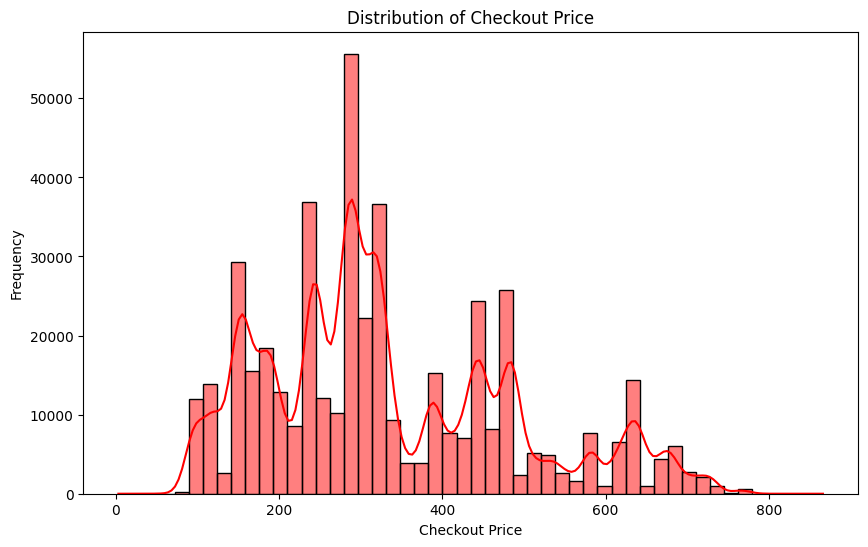

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['checkout_price'], bins=50, kde=True, color='red')
plt.title('Distribution of Checkout Price')
plt.xlabel('Checkout Price')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

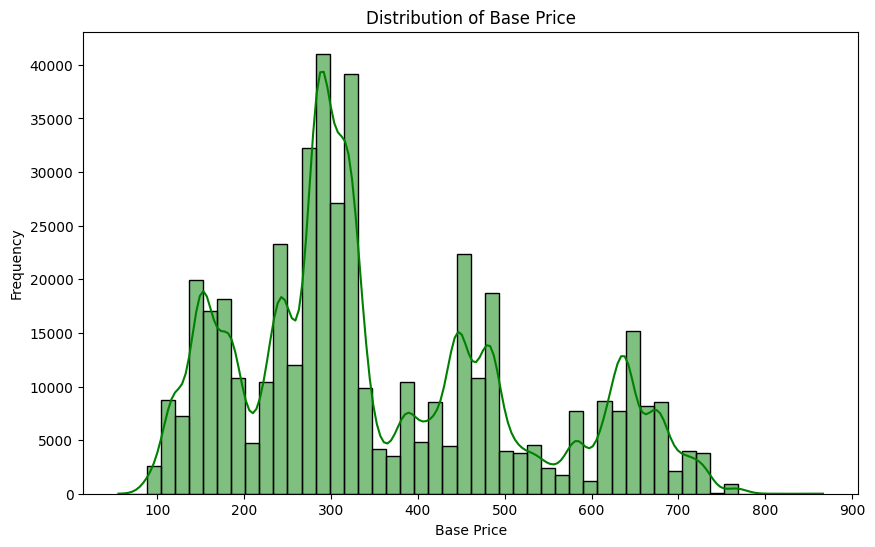

In [12]:
#Distribution of Base Prices
plt.figure(figsize=(10,6))
sns.histplot(df['base_price'], bins=50, kde=True, color='green')
plt.title('Distribution of Base Price')
plt.xlabel('Base Price')
plt.ylabel('Frequency')

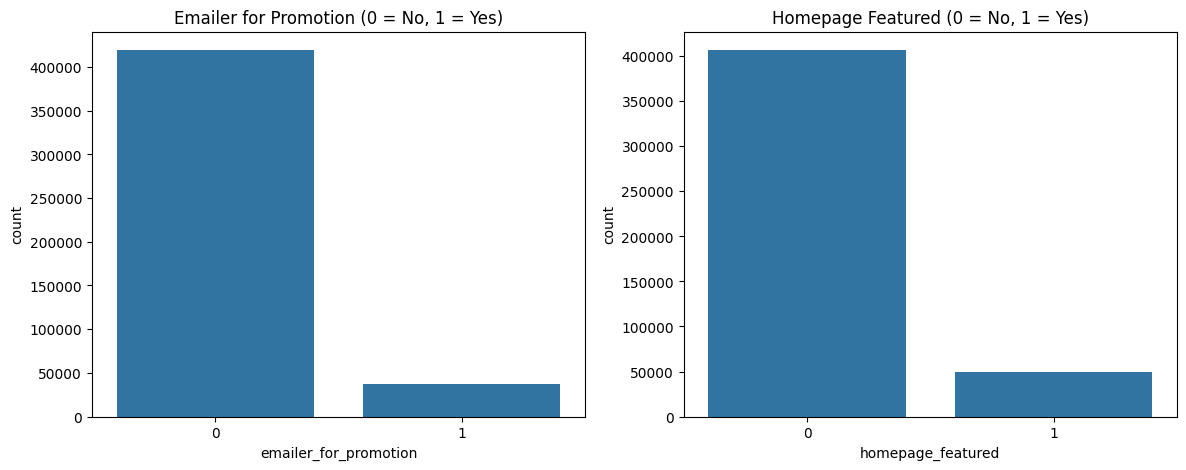

In [13]:
#Proportion of Promotions (Email & Homepage)
fig, axs = plt.subplots(1, 2, figsize=(14,5))

# Email promotion
sns.countplot(x='emailer_for_promotion', data=df, ax=axs[0])
axs[0].set_title('Emailer for Promotion (0 = No, 1 = Yes)')

# Homepage feature
sns.countplot(x='homepage_featured', data=df, ax=axs[1])
axs[1].set_title('Homepage Featured (0 = No, 1 = Yes)')

plt.show()


<ipython-input-14-088a3d818a5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emailer_for_promotion', y='checkout_price', data=df, palette='Set2')


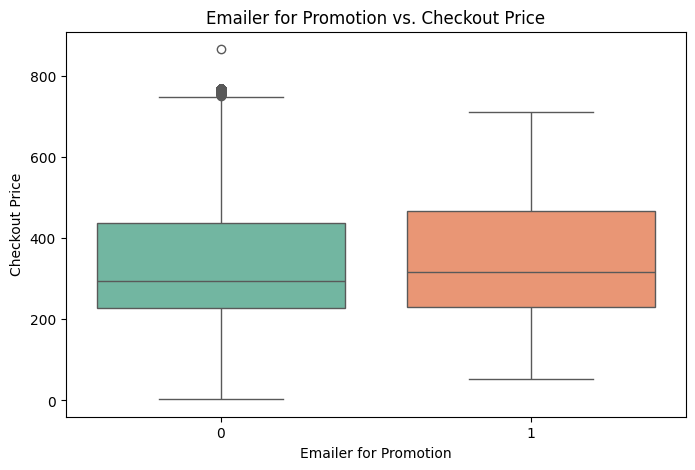

In [14]:
#Bivariate Analysis
#Email promotion impact
plt.figure(figsize=(8,5))
sns.boxplot(x='emailer_for_promotion', y='checkout_price', data=df, palette='Set2')
plt.title('Emailer for Promotion vs. Checkout Price')
plt.xlabel('Emailer for Promotion')
plt.ylabel('Checkout Price')
plt.show()

<ipython-input-15-fcfd35a97e8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='homepage_featured', y='checkout_price', data=df, palette='Set2')


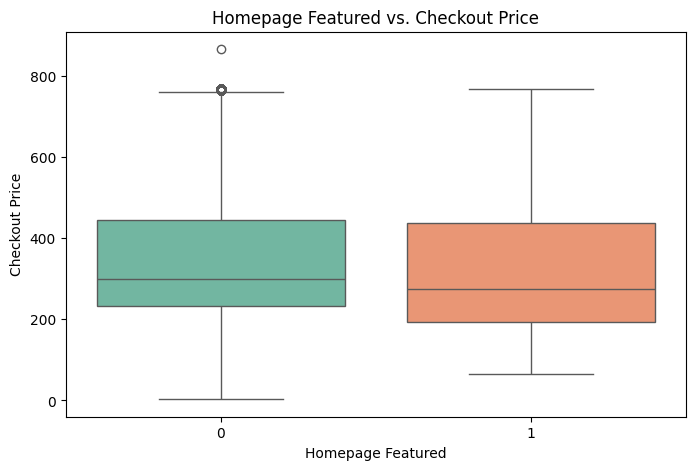

In [15]:
#Homepage Feature Impact
plt.figure(figsize=(8,5))
sns.boxplot(x='homepage_featured', y='checkout_price', data=df, palette='Set2')
plt.title('Homepage Featured vs. Checkout Price')
plt.xlabel('Homepage Featured')
plt.ylabel('Checkout Price')
plt.show()

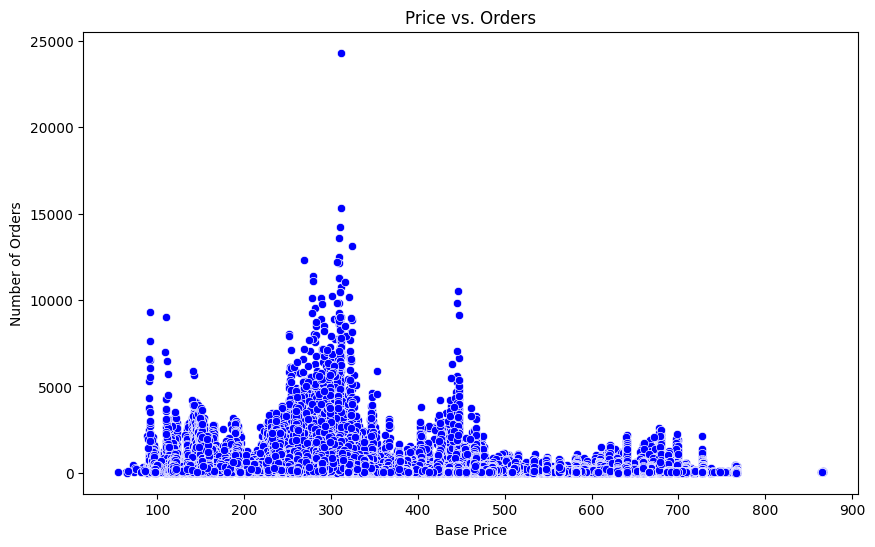

In [16]:
#Price vs. Orders
plt.figure(figsize=(10,6))
sns.scatterplot(x='base_price',y='num_orders', data=df, color='blue')
plt.title('Price vs. Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.show()

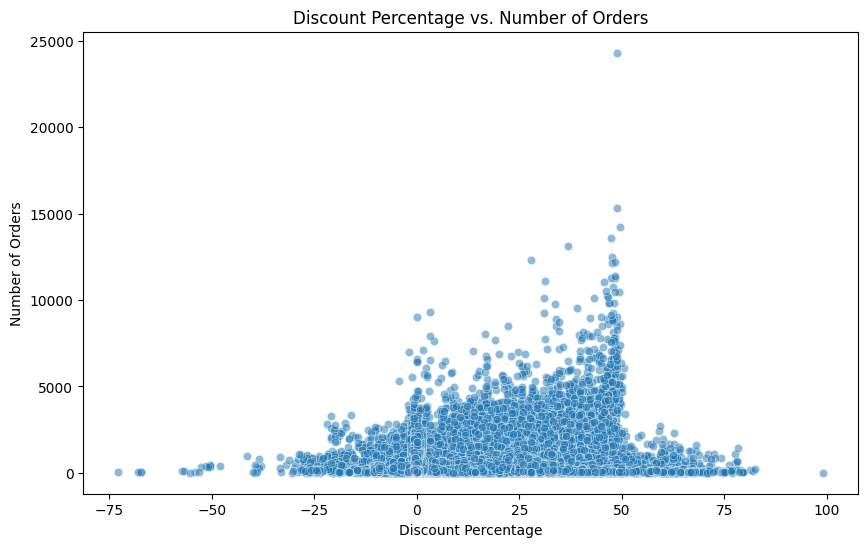

In [17]:
# Create discount %
df['discount_percent'] = ((df['base_price'] - df['checkout_price']) / df['base_price']) * 100

plt.figure(figsize=(10,6))
sns.scatterplot(x='discount_percent', y='num_orders', data=df, alpha=0.5)
plt.title('Discount Percentage vs. Number of Orders')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Orders')
plt.show()


<ipython-input-18-ceeb01f64303>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=center_orders.index, y=center_orders.values, palette='magma')


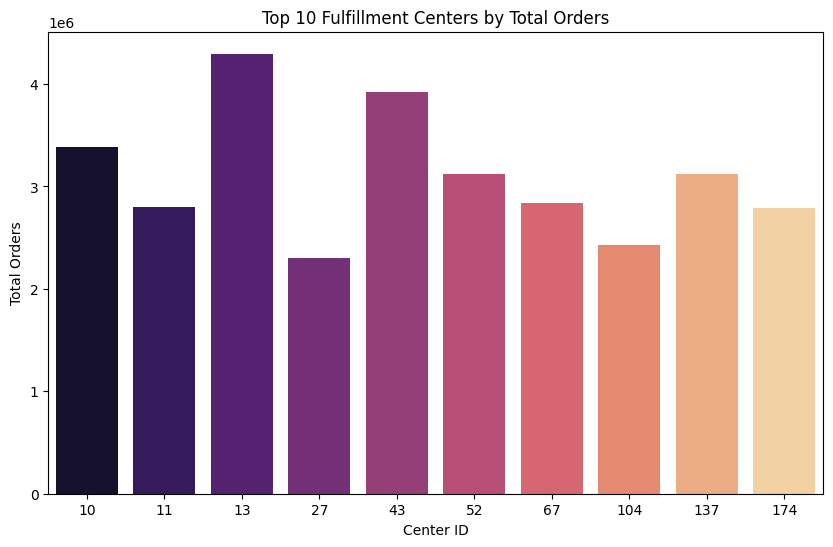

In [18]:
#Top Fulfillment Centers by Total Orders
center_orders = df.groupby('center_id')['num_orders'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=center_orders.index, y=center_orders.values, palette='magma')
plt.title('Top 10 Fulfillment Centers by Total Orders')
plt.xlabel('Center ID')
plt.ylabel('Total Orders')
plt.show()


<ipython-input-19-4861ae5a5509>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_orders.index.astype(str), y=meal_orders.values, palette='cool')


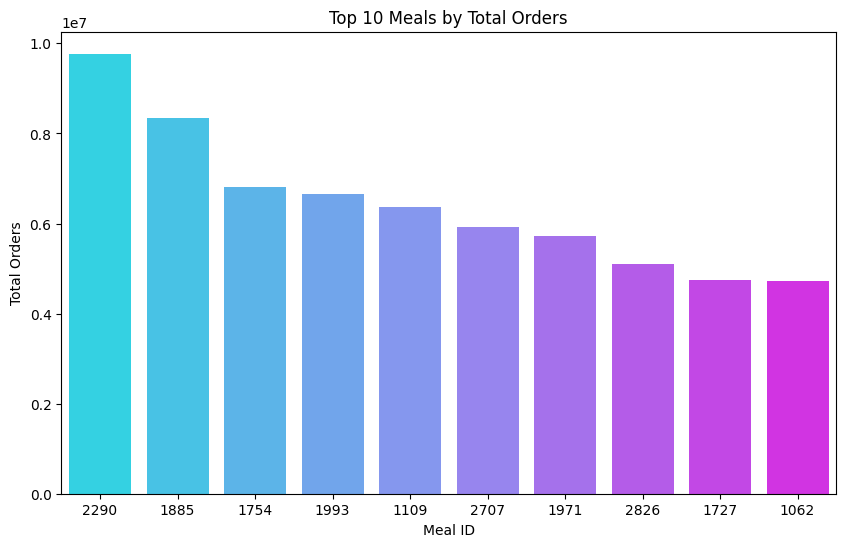

In [19]:
#Top Meals by Total Orders
meal_orders = df.groupby('meal_id')['num_orders'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=meal_orders.index.astype(str), y=meal_orders.values, palette='cool')
plt.title('Top 10 Meals by Total Orders')
plt.xlabel('Meal ID')
plt.ylabel('Total Orders')
plt.show()


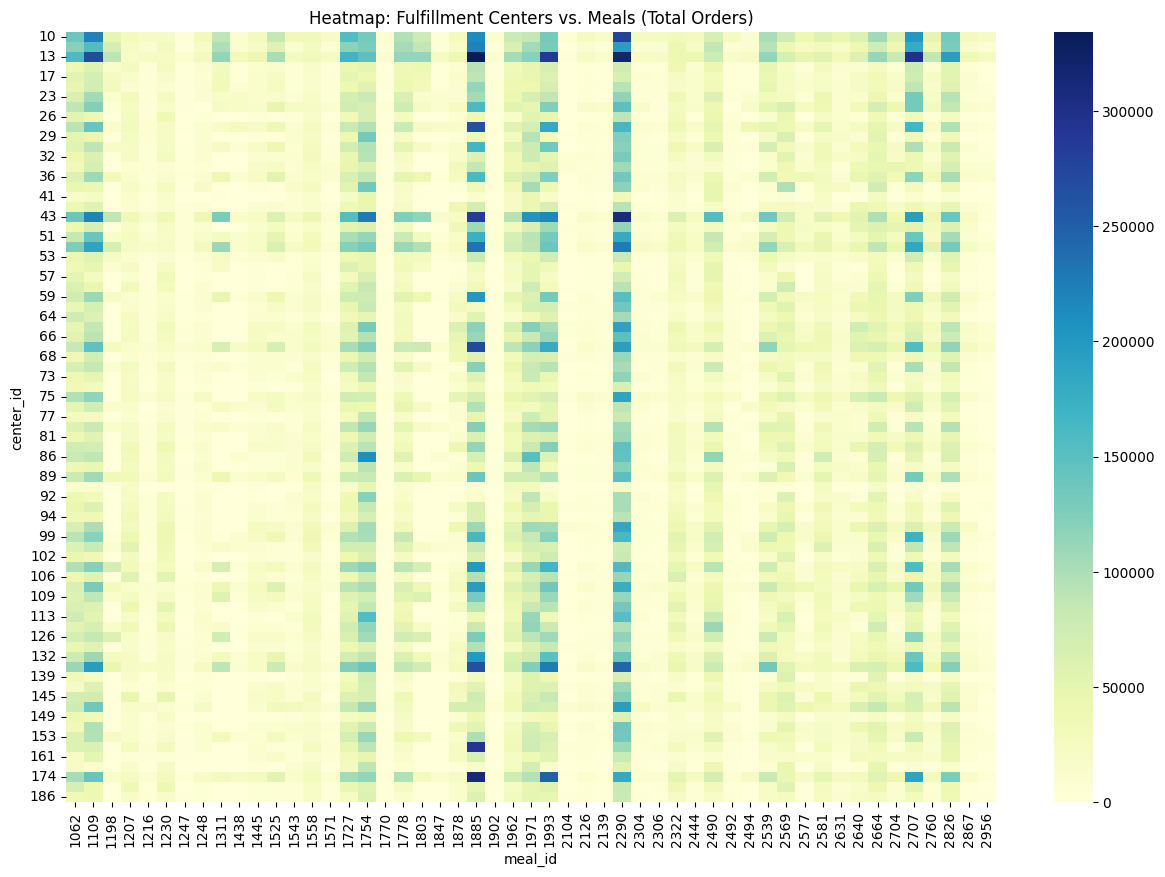

In [20]:
#Heatmap of Centers vs. Meals (Order Volume)
pivot_table = df.pivot_table(index='center_id', columns='meal_id', values='num_orders', aggfunc='sum', fill_value=0)

plt.figure(figsize=(15,10))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap: Fulfillment Centers vs. Meals (Total Orders)')
plt.show()


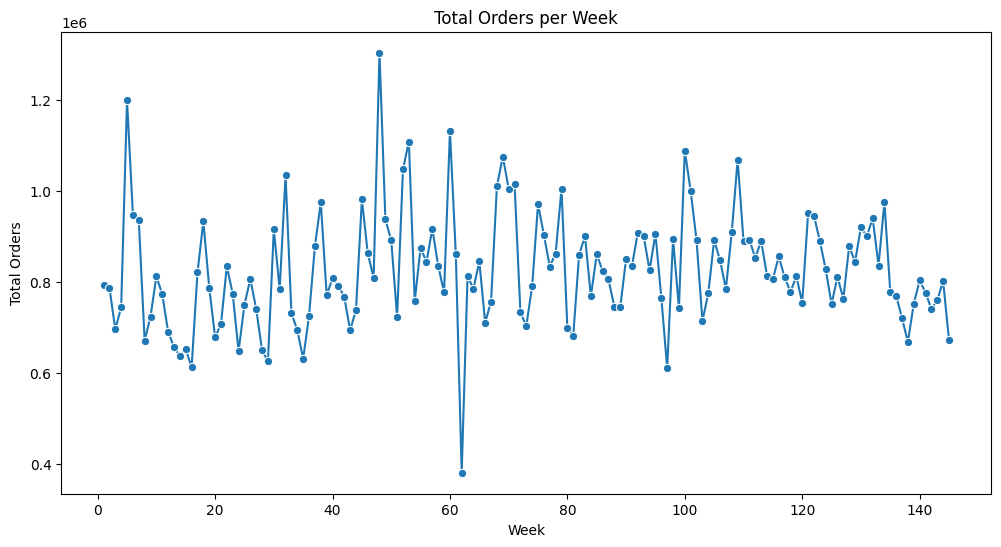

In [21]:
#Time Series Trend (by Week)
weekly_orders=df.groupby('week')['num_orders'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=weekly_orders.index, y=weekly_orders.values, marker='o')
plt.title('Total Orders per Week')
plt.xlabel('Week')
plt.ylabel('Total Orders')
plt.show()


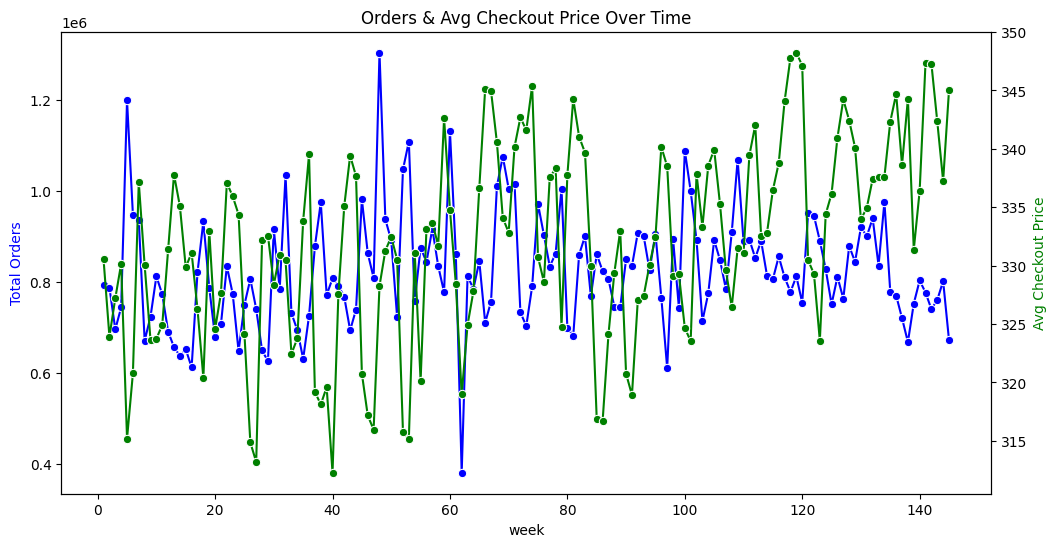

In [22]:
#Price & Orders Trend Together
weekly_data = df.groupby('week').agg({'num_orders':'sum', 'checkout_price':'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

# Orders
sns.lineplot(x='week', y='num_orders', data=weekly_data, marker='o', ax=ax1, color='blue')
ax1.set_ylabel('Total Orders', color='blue')

# Price (secondary y-axis)
ax2 = ax1.twinx()
sns.lineplot(x='week', y='checkout_price', data=weekly_data, marker='o', ax=ax2, color='green')
ax2.set_ylabel('Avg Checkout Price', color='green')

plt.title('Orders & Avg Checkout Price Over Time')
plt.show()


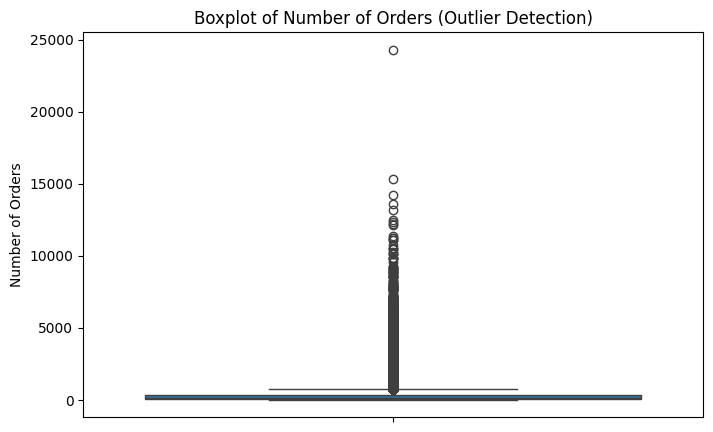

In [23]:
#Outlier Detection
plt.figure(figsize=(8,5))
sns.boxplot(y='num_orders', data=df)
plt.title('Boxplot of Number of Orders (Outlier Detection)')
plt.ylabel('Number of Orders')
plt.show()


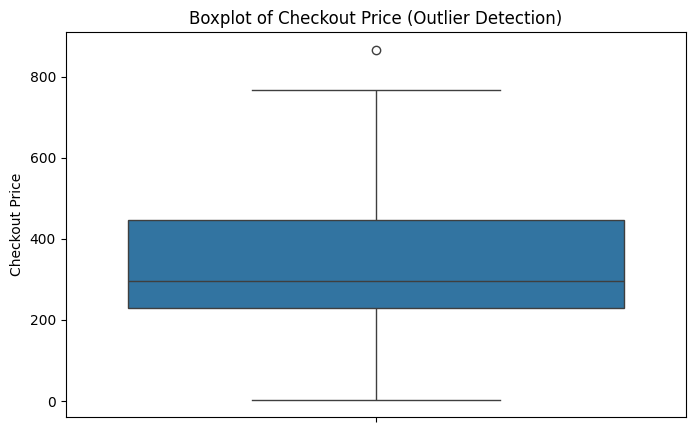

In [24]:
#Boxplot: Checkout Price
plt.figure(figsize=(8,5))
sns.boxplot(y='checkout_price', data=df)
plt.title('Boxplot of Checkout Price (Outlier Detection)')
plt.ylabel('Checkout Price')
plt.show()


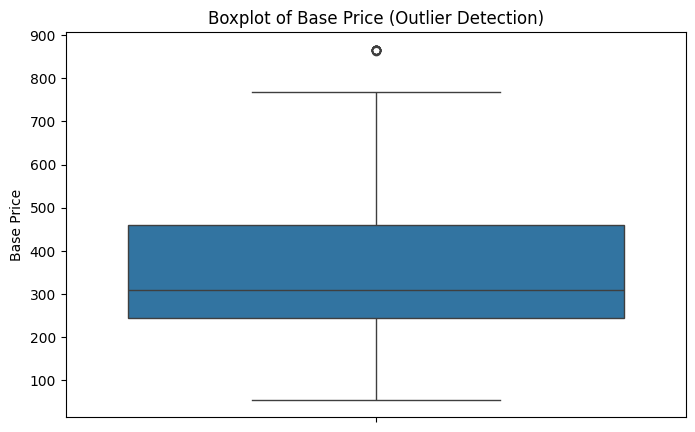

In [25]:
#Boxplot: Base Price
plt.figure(figsize=(8,5))
sns.boxplot(y='base_price', data=df)
plt.title('Boxplot of Base Price (Outlier Detection)')
plt.ylabel('Base Price')
plt.show()


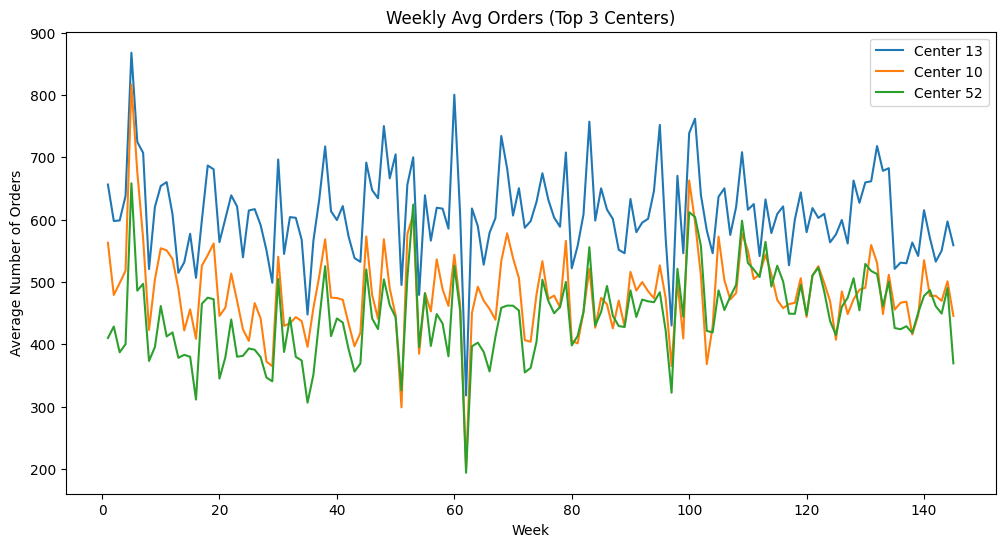

In [26]:
# Weekly Trend per Center (Example: Top 3 Centers)
top_centers = df['center_id'].value_counts().head(3).index

plt.figure(figsize=(12,6))
for center in top_centers:
    center_weekly = df[df['center_id'] == center].groupby('week')['num_orders'].mean()
    sns.lineplot(x=center_weekly.index, y=center_weekly.values, label=f'Center {center}')

plt.title('Weekly Avg Orders (Top 3 Centers)')
plt.xlabel('Week')
plt.ylabel('Average Number of Orders')
plt.legend()
plt.show()


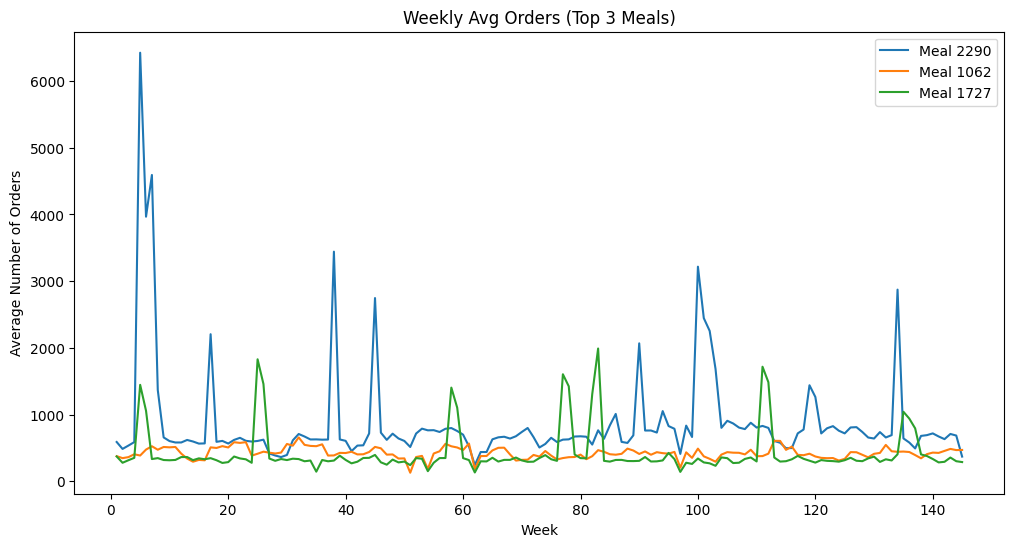

In [27]:
# Weekly Trend per Meal (Example: Top 3 Meals)
top_meals = df['meal_id'].value_counts().head(3).index

plt.figure(figsize=(12,6))
for meal in top_meals:
    meal_weekly = df[df['meal_id'] == meal].groupby('week')['num_orders'].mean()
    sns.lineplot(x=meal_weekly.index, y=meal_weekly.values, label=f'Meal {meal}')

plt.title('Weekly Avg Orders (Top 3 Meals)')
plt.xlabel('Week')
plt.ylabel('Average Number of Orders')
plt.legend()
plt.show()
